In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
%matplotlib inline

In [3]:
df=pd.read_excel('Adv data.xlsx')
df1=pd.read_excel('Index Geo.xlsx')
df2=pd.read_excel('Report Server Data.xlsx')

In [4]:
#Соединим наши две таблицы, которые имеют одинаковую размерность
data=pd.concat([df,df2],axis=1)

In [5]:
data

,Год,Номер недели,Project Name,Кампания,Клики,Число показов,Стоимость,geo,Год,Номер недели,Project Name,Кампания,Кол-во регистраций,Продажи,Доход,geo
0,2017,53,Project.com,Campaign_1,208856,32373758,6446.0,1006467,2017,53,Project.com,Campaign_1,800,2,400.0,1006467
1,2018,1,Project.com,Campaign_1,227526,51561890,12348.0,1006467,2018,1,Project.com,Campaign_1,1400,5,1000.0,1006467
2,2018,2,Project.com,Campaign_1,181074,41090580,10806.0,1006467,2018,2,Project.com,Campaign_1,1354,5,1500.0,1006467
3,2018,3,Project.com,Campaign_1,209486,48896722,11676.0,1006467,2018,3,Project.com,Campaign_1,1486,5,1793.0,1006467
4,2018,4,Project.com,Campaign_1,191794,31204260,7860.0,1006467,2018,4,Project.com,Campaign_1,1888,7,2098.0,1006467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2018,1,Project.com,Campaign_9,288590,57554028,19614.0,9074067,2018,1,Project.com,Campaign_9,15946,78,6597.0,9074067
122,2018,2,Project.com,Campaign_9,160042,32335632,10812.0,9074067,2018,2,Project.com,Campaign_9,10584,289,5645.0,9074067
123,2018,3,Project.com,Campaign_9,219918,57527978,13862.0,9074067,2018,3,Project.com,Campaign_9,10954,302,6455.0,9074067
124,2018,4,Project.com,Campaign_9,110026,30052342,6918.0,9074067,2018,4,Project.com,Campaign_9,11154,104,6546.0,9074067


In [6]:
#Удалим дубликаты столбцов для удобства
data=data.T.groupby(level=0).first().T
data

,Project Name,geo,Год,Доход,Кампания,Клики,Кол-во регистраций,Номер недели,Продажи,Стоимость,Число показов
0,Project.com,1006467,2017,400,Campaign_1,208856,800,53,2,6446,32373758
1,Project.com,1006467,2018,1000,Campaign_1,227526,1400,1,5,12348,51561890
2,Project.com,1006467,2018,1500,Campaign_1,181074,1354,2,5,10806,41090580
3,Project.com,1006467,2018,1793,Campaign_1,209486,1486,3,5,11676,48896722
4,Project.com,1006467,2018,2098,Campaign_1,191794,1888,4,7,7860,31204260
...,...,...,...,...,...,...,...,...,...,...,...
121,Project.com,9074067,2018,6597,Campaign_9,288590,15946,1,78,19614,57554028
122,Project.com,9074067,2018,5645,Campaign_9,160042,10584,2,289,10812,32335632
123,Project.com,9074067,2018,6455,Campaign_9,219918,10954,3,302,13862,57527978
124,Project.com,9074067,2018,6546,Campaign_9,110026,11154,4,104,6918,30052342


In [7]:
#Сделаем перестановку столбцов для удобства
columns=['Год','Кампания','Project Name','geo','Доход','Клики','Кол-во регистраций','Номер недели','Продажи','Стоимость','Число показов']
data=data[columns]

In [8]:
# Отсортируем данные по годам
data.sort_values(by='Год',inplace=True)
data

,Год,Кампания,Project Name,geo,Доход,Клики,Кол-во регистраций,Номер недели,Продажи,Стоимость,Число показов
0,2017,Campaign_1,Project.com,1006467,400,208856,800,53,2,6446,32373758
35,2017,Campaign_15,Project2.com,1000035,19028,14806,1476,53,14,15983,1456465
40,2017,Campaign_16,Project.com,1002674,700,2367,234,49,1,567,456783
41,2017,Campaign_16,Project.com,1002674,1100,3589,245,51,1,789,567893
42,2017,Campaign_16,Project.com,1002674,4567,4890,341,52,2,980,901282
...,...,...,...,...,...,...,...,...,...,...,...
124,2018,Campaign_9,Project.com,9074067,6546,110026,11154,4,104,6918,30052342
22,2018,Campaign_13,Project.com,9052799,7098,2456,187,1,9,3192.8,178004
58,2018,Campaign_18,Project.com,1005897,7242,6,5,5,2,6,320
70,2018,Campaign_2,Project.com,1006008,1.49009,78410,1028,1,1,4294,27160202


In [9]:
# Поменяем индексы наших данных, чтобы потом можно было легко отображать данные на графике
data.reset_index(drop=True,inplace=True)
data

,Год,Кампания,Project Name,geo,Доход,Клики,Кол-во регистраций,Номер недели,Продажи,Стоимость,Число показов
0,2017,Campaign_1,Project.com,1006467,400,208856,800,53,2,6446,32373758
1,2017,Campaign_15,Project2.com,1000035,19028,14806,1476,53,14,15983,1456465
2,2017,Campaign_16,Project.com,1002674,700,2367,234,49,1,567,456783
3,2017,Campaign_16,Project.com,1002674,1100,3589,245,51,1,789,567893
4,2017,Campaign_16,Project.com,1002674,4567,4890,341,52,2,980,901282
...,...,...,...,...,...,...,...,...,...,...,...
121,2018,Campaign_9,Project.com,9074067,6546,110026,11154,4,104,6918,30052342
122,2018,Campaign_13,Project.com,9052799,7098,2456,187,1,9,3192.8,178004
123,2018,Campaign_18,Project.com,1005897,7242,6,5,5,2,6,320
124,2018,Campaign_2,Project.com,1006008,1.49009,78410,1028,1,1,4294,27160202


### Если я правильно понял, то стоимость - это все затраты на продвижение проекта

In [29]:
# Расситаем все главные метрики по имеющимся данным и посмотрим, как это будет выглядеть на графике.
data['CTR']=np.nan
data['CR']=np.nan
data['CAC']=np.nan
data['ROI']=np.nan
data['CF']=np.nan

for i in range(data.shape[0]):
    data['CTR'].iloc[i]=data.iloc[i,5]/data.iloc[i,10]
    data['CR'].iloc[i]=data.iloc[i,6]/data.iloc[i,10]
    if data.iloc[i,8]==0:
        data['CAC'].iloc[i]=data.iloc[i,9]
    else:
        data['CAC'].iloc[i]=round(data.iloc[i,9]/data.iloc[i,8],2)
    data['ROI'].iloc[i]=((data.iloc[i,4]-data.iloc[i,9])/data.iloc[i,9])*100
    data['CF'].iloc[i]=data.iloc[i,4]-data.iloc[i,9]

C:\anaconda\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [30]:
data

,Год,Кампания,Project Name,geo,Доход,Клики,Кол-во регистраций,Номер недели,Продажи,Стоимость,Число показов,CTR,CR,CAC,ROI,CF
0,2017,Campaign_1,Project.com,1006467,400,208856,800,53,2,6446,32373758,0.006451,0.000025,3223.00,-93.794601,-6046.000000
1,2017,Campaign_15,Project2.com,1000035,19028,14806,1476,53,14,15983,1456465,0.010166,0.001013,1141.64,19.051492,3045.000000
2,2017,Campaign_16,Project.com,1002674,700,2367,234,49,1,567,456783,0.005182,0.000512,567.00,23.456790,133.000000
3,2017,Campaign_16,Project.com,1002674,1100,3589,245,51,1,789,567893,0.006320,0.000431,789.00,39.416984,311.000000
4,2017,Campaign_16,Project.com,1002674,4567,4890,341,52,2,980,901282,0.005426,0.000378,490.00,366.020408,3587.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,2018,Campaign_9,Project.com,9074067,6546,110026,11154,4,104,6918,30052342,0.003661,0.000371,66.52,-5.377277,-372.000000
122,2018,Campaign_13,Project.com,9052799,7098,2456,187,1,9,3192.8,178004,0.013797,0.001051,354.76,122.312704,3905.200000
123,2018,Campaign_18,Project.com,1005897,7242,6,5,5,2,6,320,0.018750,0.015625,3.00,120600.000000,7236.000000
124,2018,Campaign_2,Project.com,1006008,1.49009,78410,1028,1,1,4294,27160202,0.002887,0.000038,4294.00,-99.965298,-4292.509907


In [31]:
grouped=data.groupby('Project Name')
grouped.describe()

CTR                                                    \
              count      mean       std       min       25%       50%   
Project Name                                                            
Project.com   108.0  0.026619  0.064296  0.001609  0.003321  0.004446   
Project2.com   18.0  0.045616  0.045390  0.009947  0.010222  0.019650   

                                     CR            ...         ROI  \
                   75%       max  count      mean  ...         75%   
Project Name                                       ...               
Project.com   0.013733  0.432674  108.0  0.008378  ...  368.007502   
Project2.com  0.097820  0.139681   18.0  0.017602  ...  185.044506   

                                CF                                       \
                        max  count          mean           std      min   
Project Name                                                              
Project.com   398400.000000  108.0   1660.521636   8160.286407 -21706.0   
Project2.com     821.878351   18.0  19592.166667  33904.720472  -4192.0   

                                                       
                      25%     50%       75%       max  
Project Name                                           
Project.com  -1217.332505   456.0   4015.00   33988.0  
Project2.com  1192.750000  3434.5  11133.75  107288.0  

[2 rows x 40 columns]

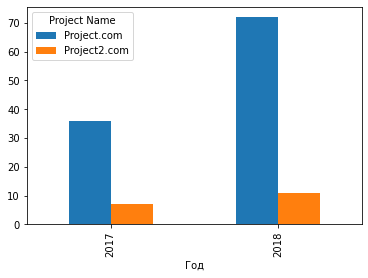

In [32]:
pd.crosstab(data['Год'],data['Project Name']).plot.bar()

### Посмотрим на проекты немного детальнее:

In [93]:
df6=data[['Project Name','Доход','Стоимость']]
df6=pd.DataFrame(df6[df6['Project Name']=='Project.com'].mean())
df6.columns=['Показатели']
df6

,Показатели
Доход,5822.419784
Стоимость,4161.898148


In [96]:
df7=data[['Project Name','Доход','Стоимость']]
df7=pd.DataFrame(df7[df7['Project Name']=='Project2.com'].mean())
df7.columns=['Показатели']
df7

,Показатели
Доход,34174.777778
Стоимость,14582.611111


Вывод: Проект Project 2 имеет более хорошие показатели по соотношению доход/затраты. В среднем доходы от Project 2 в 2,35 раз больше нежели расходы. По первому проекты все не так здорово, однако он тоже не является убыточным. Мы видим, что доходы с Project1 в 1,39 раз больше расходов. Видим, что проект 2 успешнее. Если мы хотим добиться некторого баланса в проектах, то стоит пересмотреть затраты бюджета на Project 2 и перенести их на первый. Мы можем активировать менее плодоносные каналы второго проекта для первого, чтобы увеличить привлечения для Project1, например. Приток новых клиентов сгенерирует новую базу клиентов, которые потенциально увеличат наши доходы, а значит наши кампании смогут повысить свои метрики (ROI,CF)

Как мы видим в 2018 году было реализовано больше кампаний по обоим проектам. Однако увеличение количества проектов не гарантирует успех организации, так как многие могут оказаться невыгодными. Следует рассмотреть детально метрики

In [51]:
# Таблица-отчет по нашим метрикам по каждой компании
data.groupby(['Год','Кампания']).mean()

CTR        CR          CAC            ROI            CF
Год  Кампания                                                                 
2017 Campaign_1   0.006451  0.000025  3223.000000     -93.794601  -6046.000000
     Campaign_10  0.006494  0.000000     0.700000    -100.000000     -0.700000
     Campaign_11  0.236447  0.096330   850.000000     -53.911765  -1833.000000
     Campaign_12  0.099069  0.018620   844.670000     -64.419890  -8162.000000
     Campaign_13  0.019294  0.001541   533.242500      -3.974163    227.200000
     Campaign_14  0.095854  0.036683   632.250000      -4.265003     10.500000
     Campaign_15  0.010109  0.001019  1347.750000      -1.432518    148.666667
     Campaign_16  0.005642  0.000441   615.333333     142.964727   1343.666667
     Campaign_17  0.019587  0.004840   450.320000     292.310754  28895.000000
     Campaign_18  0.012141  0.005002     3.500000   75166.666667   2623.000000
     Campaign_19  0.043126  0.001878   921.098000     123.475199   3431.200000
     Campaign_2   0.002466  0.000059  3414.000000     -99.251684  -3398.811139
     Campaign_20  0.043243  0.003248   493.125000     153.240139   2229.500000
     Campaign_3   0.003816  0.000114  2015.000000     -87.766606  -1613.500000
     Campaign_4   0.002324  0.000177    91.430000    2536.790964   8053.500000
     Campaign_5   0.002533  0.000145    22.500000    3123.275862    782.500000
     Campaign_6   0.003010  0.000091   530.000000     -91.509434   -970.000000
     Campaign_7   0.002421  0.000152   642.000000     -87.538941   -562.000000
     Campaign_8   0.002054  0.000086   264.000000     291.666667    770.000000
     Campaign_9   0.004454  0.000223   407.496000     -69.452160 -11904.800000
2018 Campaign_1   0.005080  0.000047  1739.372000     -70.631889  -7427.000000
     Campaign_10  0.008986  0.000600    77.400000     -42.207792     11.600000
     Campaign_11  0.303201  0.160148   471.062500      55.063851   1365.250000
     Campaign_12  0.098159  0.018524   899.383333      35.486871   4521.333333
     Campaign_13  0.013448  0.001020   326.390000      87.431728   2931.740000
     Campaign_14  0.111433  0.052188   283.257500     124.199642   3376.750000
     Campaign_15  0.010160  0.000835   817.480000      28.627534   6614.000000
     Campaign_16  0.008812  0.000830   852.110000      85.664019   1973.000000
     Campaign_17  0.024503  0.006213   319.913333     705.610630  84813.000000
     Campaign_18  0.008380  0.006585     2.800000  174682.666667   4483.200000
     Campaign_19  0.053692  0.001767   643.110000     212.870543  20464.750000
     Campaign_2   0.003338  0.000077  2458.400000     -99.835667  -2453.208204
     Campaign_20  0.006637  0.000436   474.656667     -23.468113   -322.333333
     Campaign_3   0.003497  0.000184   595.676000     419.508683   6566.000000
     Campaign_4   0.003440  0.000089   479.410000    1562.677048   9473.600000
     Campaign_5   0.002897  0.000078   160.800000     459.956613    660.200000
     Campaign_6   0.002942  0.000139   423.334000     -25.377039   -661.400000
     Campaign_7   0.003613  0.000106  2786.000000     -81.674917  -3208.000000
     Campaign_8   0.002952  0.000468   330.068000    7779.496372  14143.600000
     Campaign_9   0.004324  0.000266   109.150000     -11.387758  -4756.800000

По данной таблице мы можем увидеть, что многие проекты довольно не выгодны для организации. Следует рассмотреть ROI(коэффициент окупаемости) и CF(денежный поток) немного подробнее, однако уже сейчас видно, что есть отрицательные показатели, что означает, что вложения средств в некоторые кампании нужно пересмотреть. Далее посмотрим наглядно на кампании, которые невыгодны для осуществления.

In [34]:
negative_roi=data[data['ROI']<0]
negative_roi.sort_values(by='Кампания',inplace=True)

<ipython-input-34-e316f1930b1b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_roi.sort_values(by='Кампания',inplace=True)


In [35]:
negative_roi.reset_index(drop=True)

,Год,Кампания,Project Name,geo,Доход,Клики,Кол-во регистраций,Номер недели,Продажи,Стоимость,Число показов,CTR,CR,CAC,ROI,CF
0,2017,Campaign_1,Project.com,1006467,400,208856,800,53,2,6446,32373758,0.006451,0.000025,3223.00,-93.794601,-6046.000000
1,2018,Campaign_1,Project.com,1006467,1793,209486,1486,3,5,11676,48896722,0.004284,0.000030,2335.20,-84.643714,-9883.000000
2,2018,Campaign_1,Project.com,1006467,2098,191794,1888,4,7,7860,31204260,0.006146,0.000061,1122.86,-73.307888,-5762.000000
3,2018,Campaign_1,Project.com,1006467,1500,181074,1354,2,5,10806,41090580,0.004407,0.000033,2161.20,-86.118823,-9306.000000
4,2018,Campaign_1,Project.com,1006467,4028,112718,1543,5,8,4864,18325968,0.006151,0.000084,608.00,-17.187500,-836.000000
5,2018,Campaign_1,Project.com,1006467,1000,227526,1400,1,5,12348,51561890,0.004413,0.000027,2469.60,-91.901523,-11348.000000
6,2018,Campaign_10,Project.com,1000014,0,2,0,1,0,0.8,254,0.007874,0.000000,0.80,-100.000000,-0.800000
7,2017,Campaign_10,Project.com,1000014,0,1,0,51,0,0.7,154,0.006494,0.000000,0.70,-100.000000,-0.700000
8,2017,Campaign_11,Project.com,1006563,1567,567,231,52,4,3400,2398,0.236447,0.096330,850.00,-53.911765,-1833.000000
9,2017,Campaign_12,Project.com,9052788,4508,1245,234,50,15,12670,12567,0.099069,0.018620,844.67,-64.419890,-8162.000000


Кампании в данной таблице являются невыгодными для организации. В этих проектах следует пересмотреть статьи затрат и попробовать оптимизировать инвестиции в данные проекты. Необходимо посмотреть на источники привлечения трафика на сайт — к примеру, контекстная реклама может работать, а вот email-рассылка — не приносить прибыли. Однако на данные компании все же стоит обратить внимание.

In [36]:
negative_cf=data[data['CF']<0]
negative_cf.sort_values(by='Кампания',inplace=True)
negative_roi.reset_index(drop=True)

<ipython-input-36-443809f086ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_cf.sort_values(by='Кампания',inplace=True)


,Год,Кампания,Project Name,geo,Доход,Клики,Кол-во регистраций,Номер недели,Продажи,Стоимость,Число показов,CTR,CR,CAC,ROI,CF
0,2017,Campaign_1,Project.com,1006467,400,208856,800,53,2,6446,32373758,0.006451,0.000025,3223.00,-93.794601,-6046.000000
1,2018,Campaign_1,Project.com,1006467,1793,209486,1486,3,5,11676,48896722,0.004284,0.000030,2335.20,-84.643714,-9883.000000
2,2018,Campaign_1,Project.com,1006467,2098,191794,1888,4,7,7860,31204260,0.006146,0.000061,1122.86,-73.307888,-5762.000000
3,2018,Campaign_1,Project.com,1006467,1500,181074,1354,2,5,10806,41090580,0.004407,0.000033,2161.20,-86.118823,-9306.000000
4,2018,Campaign_1,Project.com,1006467,4028,112718,1543,5,8,4864,18325968,0.006151,0.000084,608.00,-17.187500,-836.000000
5,2018,Campaign_1,Project.com,1006467,1000,227526,1400,1,5,12348,51561890,0.004413,0.000027,2469.60,-91.901523,-11348.000000
6,2018,Campaign_10,Project.com,1000014,0,2,0,1,0,0.8,254,0.007874,0.000000,0.80,-100.000000,-0.800000
7,2017,Campaign_10,Project.com,1000014,0,1,0,51,0,0.7,154,0.006494,0.000000,0.70,-100.000000,-0.700000
8,2017,Campaign_11,Project.com,1006563,1567,567,231,52,4,3400,2398,0.236447,0.096330,850.00,-53.911765,-1833.000000
9,2017,Campaign_12,Project.com,9052788,4508,1245,234,50,15,12670,12567,0.099069,0.018620,844.67,-64.419890,-8162.000000


In [37]:
negative_roi.shape[0]==negative_cf.shape[0]

True

Как мы видим таблицы с отрицательными показателями ROI и CF полностью сошлись, мы видим одни и те же кампании. Отрицательные показатели cash flow говорят нам о том, что наши доходы по рассмотренным проектам меньше затрат на эти же проекты. Однако не стоит сразу делать выводы об убыточности сразу всех проектов. Возможно, что по ним мы еще получим доход, так как сама метрика имеет временный характер. Сегодня - одна цифра, а завтра уже другая.

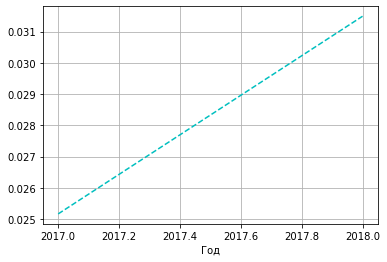

In [15]:
data.groupby('Год')['CTR'].mean().plot(color='c',style='--')
plt.grid()

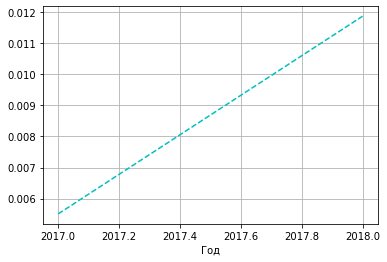

In [45]:
data.groupby('Год')['CR'].mean().plot(color='c',style='--')
plt.grid()

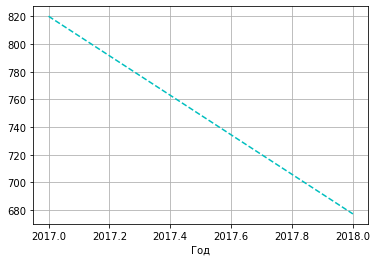

In [46]:
data.groupby('Год')['CAC'].mean().plot(color='c',style='--')
plt.grid()

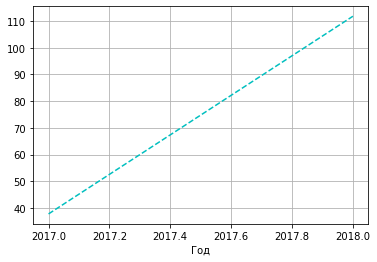

In [17]:
data.groupby('Год')['ROI'].mean().plot(color='c',style='--')
plt.grid()

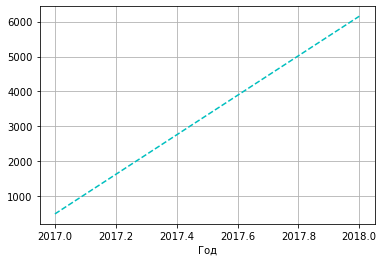

In [18]:
data.groupby('Год')['CF'].mean().plot(color='c',style='--')
plt.grid()

Как мы видим, в среднем наши показатели в рассмотренный период улучшаются. Мы наблюдаем снижение затрат и в то же время увеличение конверсии и показателя кликабельности. Компании удалось оптимизировать затраты и улучшить свои метрики за период 2017-2018

## Посмотрим, сколько нам принесла каждая кампания(канал продвижения) дохода за 2 рассмотренных года (2017,2018)

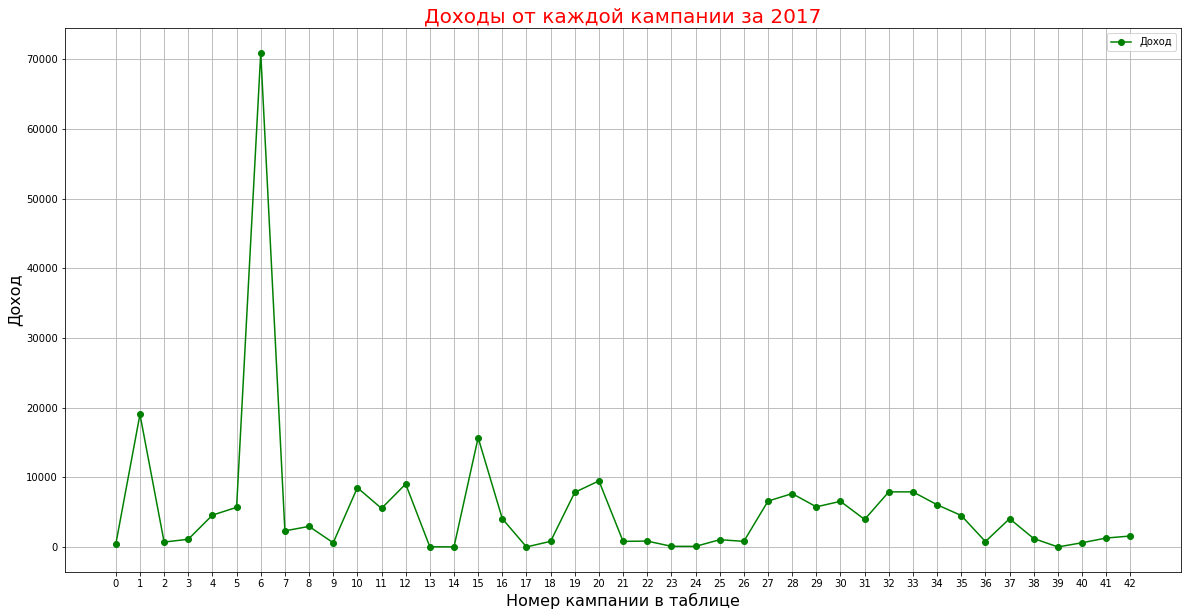

In [16]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2017].shape[0]),data[data['Год']==2017]['Доход'].values,label='Доход',color='green',marker='o')
plt.grid()
plt.legend()
plt.xlabel('Номер кампании в таблице',size=16)
plt.ylabel('Доход',size=16)
plt.title('Доходы от каждой кампании за 2017', size=20,color='red')
plt.xticks(np.arange(0,data[data["Год"]==2017].shape[0],1));

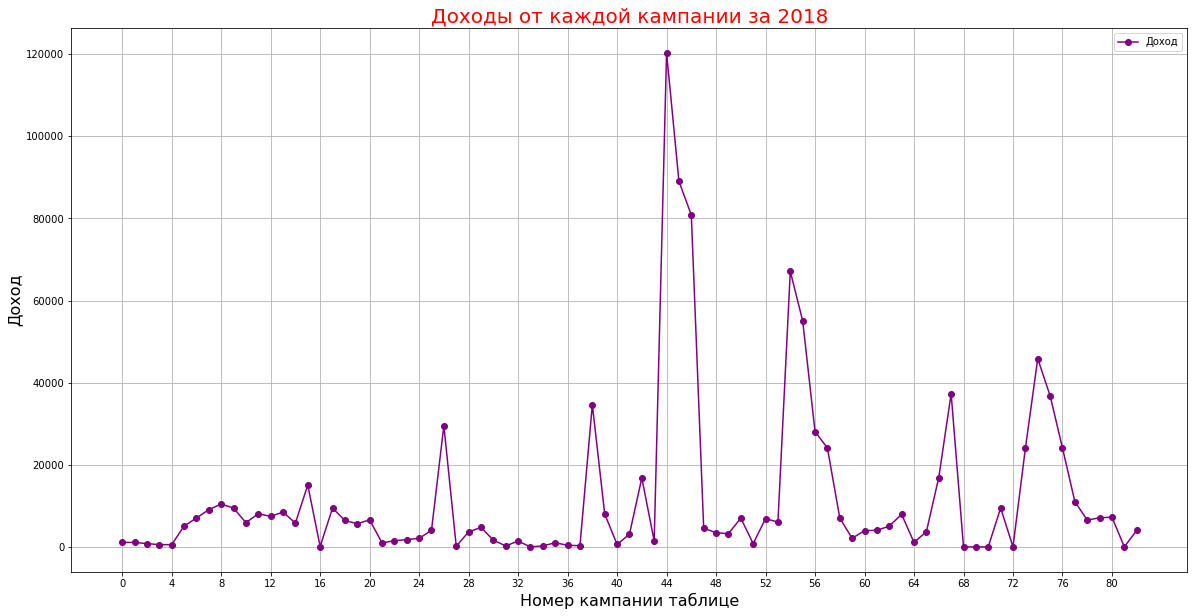

In [17]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2018].shape[0]),data[data['Год']==2018]['Доход'].values,label='Доход',color='purple',marker='o')
plt.grid()
plt.legend()
plt.xlabel('Номер кампании таблице',size=16)
plt.ylabel('Доход',size=16)
plt.title('Доходы от каждой кампании за 2018', size=20,color='red')
plt.xticks(np.arange(0,data[data["Год"]==2018].shape[0],4));

### Посмотрим, как менялся наш средний показатель CTR, CAC и CR от компании к компании

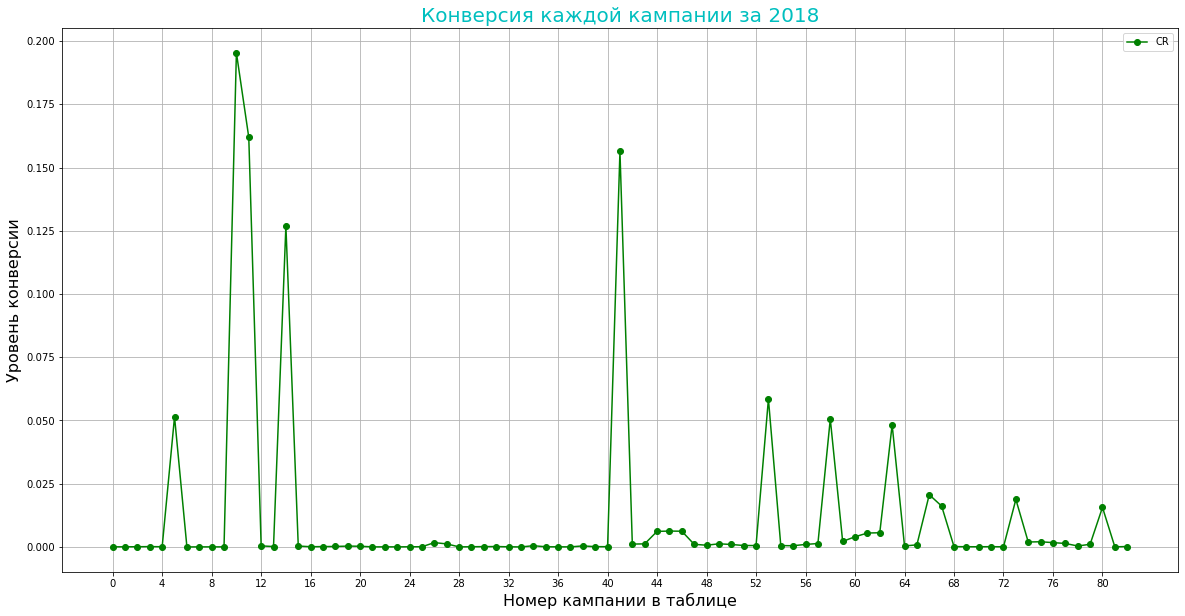

In [21]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2018].shape[0]),data[data['Год']==2018]['CR'].values,label='CR',color='green',marker='o')
plt.grid()
plt.legend()
plt.xlabel('Номер кампании в таблице',size=16)
plt.ylabel('Уровень конверсии',size=16)
plt.title('Конверсия каждой кампании за 2018', size=20,color='c')
plt.xticks(np.arange(0,data[data["Год"]==2018].shape[0],4));

Многие наши кампании не пользуются популярностью среди потребителей. Мы видим, что больше половины компаний не доходят и до 1 процента конверсии. Стоит поменять каналы продвижения, чтобы увеличить поток горячих клиентов, которые будут заинтересованы в нашем продукте. Сейчас мы видим, что большинство посетителей холодные

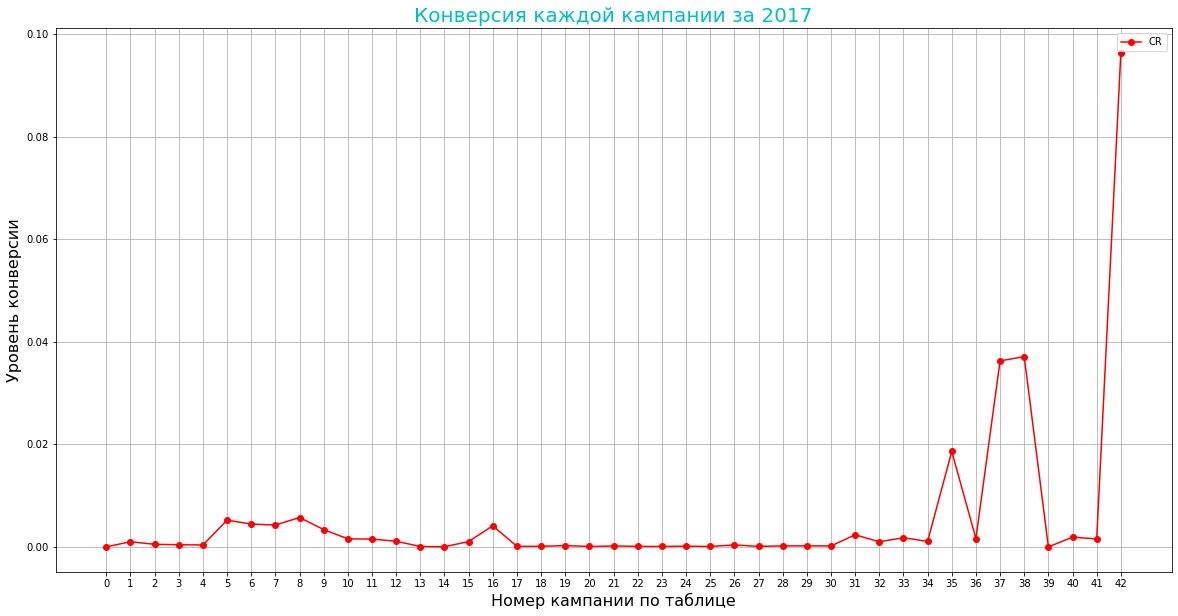

In [28]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2017].shape[0]),data[data['Год']==2017]['CR'].values,label='CR',color='red',marker='o')
plt.grid()
plt.legend()
plt.xlabel('Номер кампании по таблице',size=16)
plt.ylabel('Уровень конверсии',size=16)
plt.title('Конверсия каждой кампании за 2017', size=20,color='c')
plt.xticks(np.arange(0,data[data["Год"]==2017].shape[0],1));

В 2018 году конверсия по кампаниям значительно увеличилась в среднем. Мы видим, что больше кампаний приближаются к нормальным рыночным отметкам метркии. Возможно, что компания поменяла политику продвижения и использует новые каналы для этого.

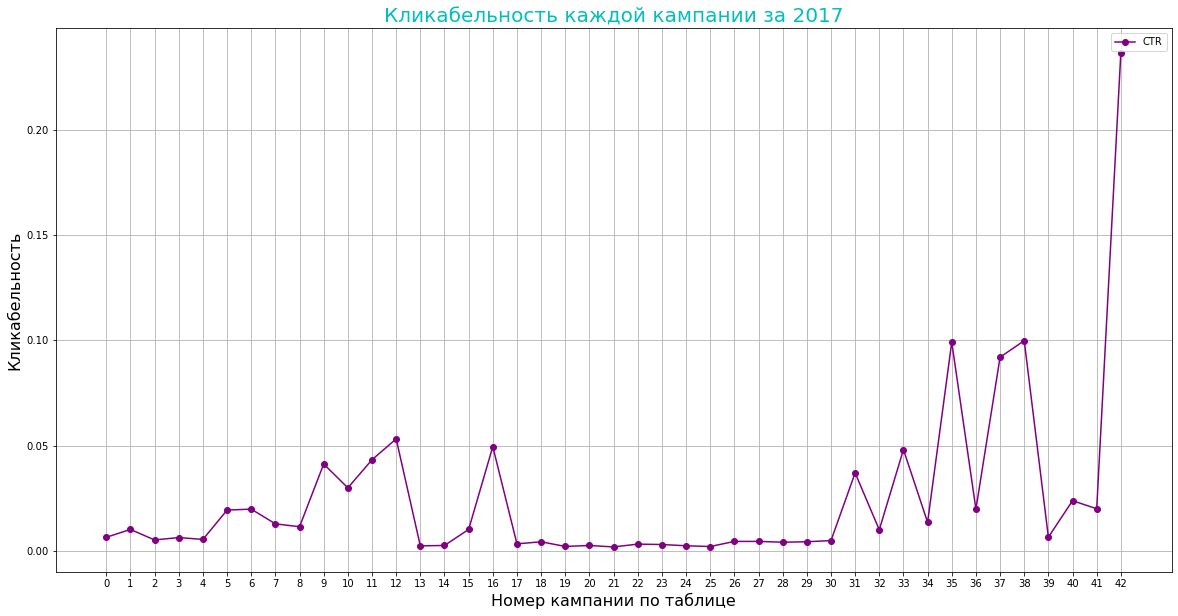

In [36]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2017].shape[0]),data[data['Год']==2017]['CTR'].values,label='CTR',color='purple',marker='o')
plt.grid()
plt.legend()
plt.xlabel('Номер кампании по таблице',size=16)
plt.ylabel('Кликабельность',size=16)
plt.title('Кликабельность каждой кампании за 2017', size=20,color='c')
plt.xticks(np.arange(0,data[data["Год"]==2017].shape[0],1));

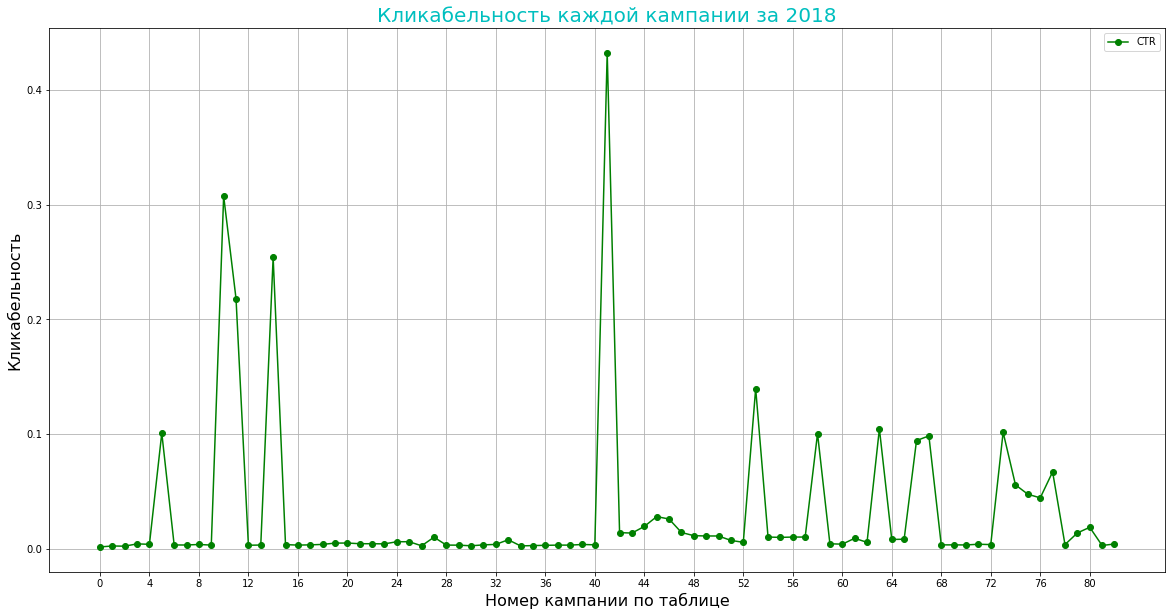

In [35]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2018].shape[0]),data[data['Год']==2018]['CTR'].values,label='CTR',color='green',marker='o')
plt.grid()
plt.legend()
plt.xlabel('Номер кампании по таблице',size=16)
plt.ylabel('Кликабельность',size=16)
plt.title('Кликабельность каждой кампании за 2018', size=20,color='c')
plt.xticks(np.arange(0,data[data["Год"]==2018].shape[0],4));

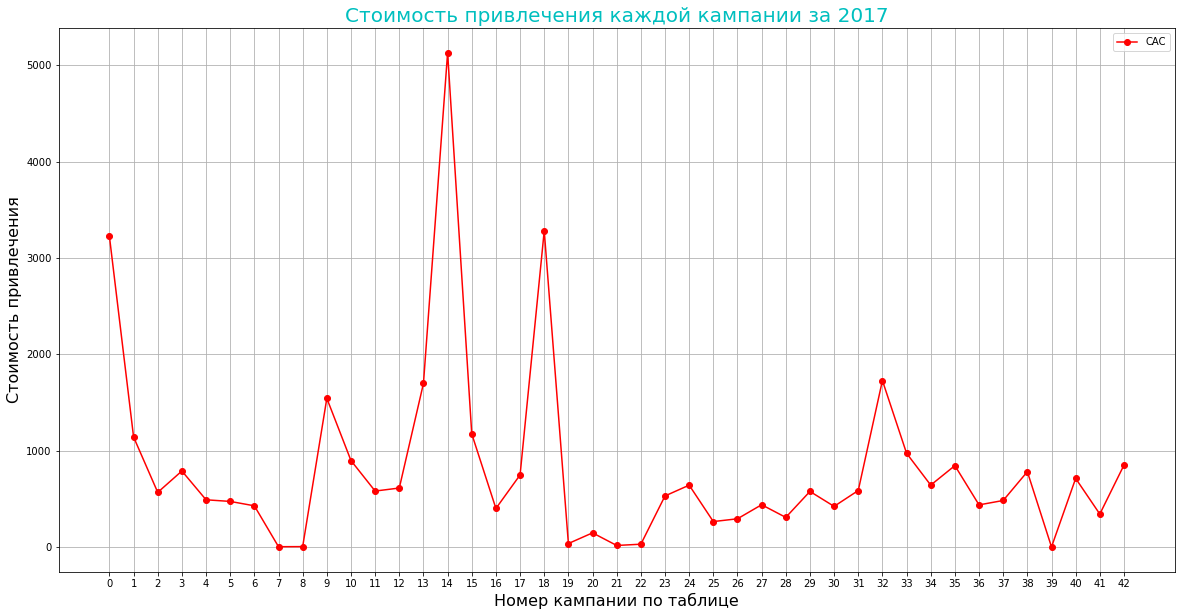

In [38]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2017].shape[0]),data[data['Год']==2017]['CAC'].values,label='CAC',color='red',marker='o')
plt.grid()
plt.legend()
plt.xlabel('Номер кампании по таблице',size=16)
plt.ylabel('Стоимость привлечения',size=16)
plt.title('Стоимость привлечения каждой кампании за 2017', size=20,color='c')
plt.xticks(np.arange(0,data[data["Год"]==2017].shape[0],1));

По графику видно, что компания неравномерно тратит бюджет на проекты. Некоторые проекты инвестируются по 4-6 тысяч, а некоторые около 0 у.е.Именно из-за этого происходит неравномерность в доходах и успешности разных кампаний. На какие-то тратится больше усилий, а на какие-то очень мало. Однако мы видим на примере Campaign_18, что даже при маленьких затратах, можно получить хороший доход. Стоит пересмотреть политику инвестиций.

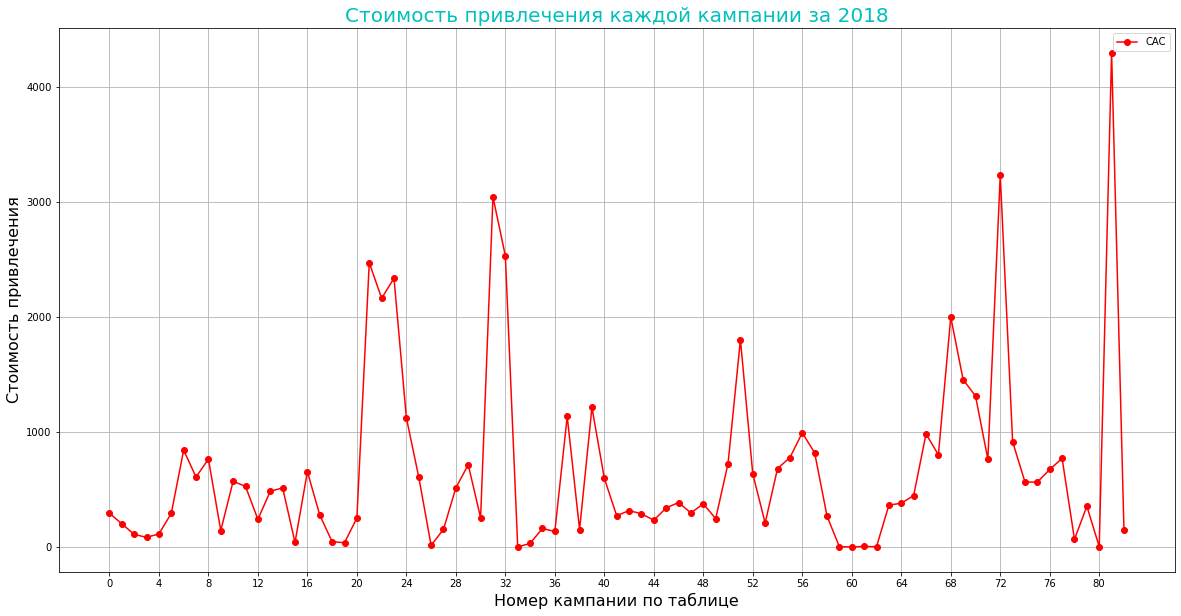

In [39]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2018].shape[0]),data[data['Год']==2018]['CAC'].values,label='CAC',color='red',marker='o')
plt.grid()
plt.legend()
plt.xlabel('Номер кампании по таблице',size=16)
plt.ylabel('Стоимость привлечения',size=16)
plt.title('Стоимость привлечения каждой кампании за 2018', size=20,color='c')
plt.xticks(np.arange(0,data[data["Год"]==2018].shape[0],4));

В 2018 году мы наблюдаем более благоразумные и равные затраты на кампании, однако это все еще нужно дорабатывать. В 2018 году мы как раз и наблюдаем резкое увеличение дохода, и увеличение соотношения доходов к расходам. Казалось бы, увеличили затраты почти на все проекты, но компания не потеряла эти деньги, а наоборот с их помощью получила еще больше.

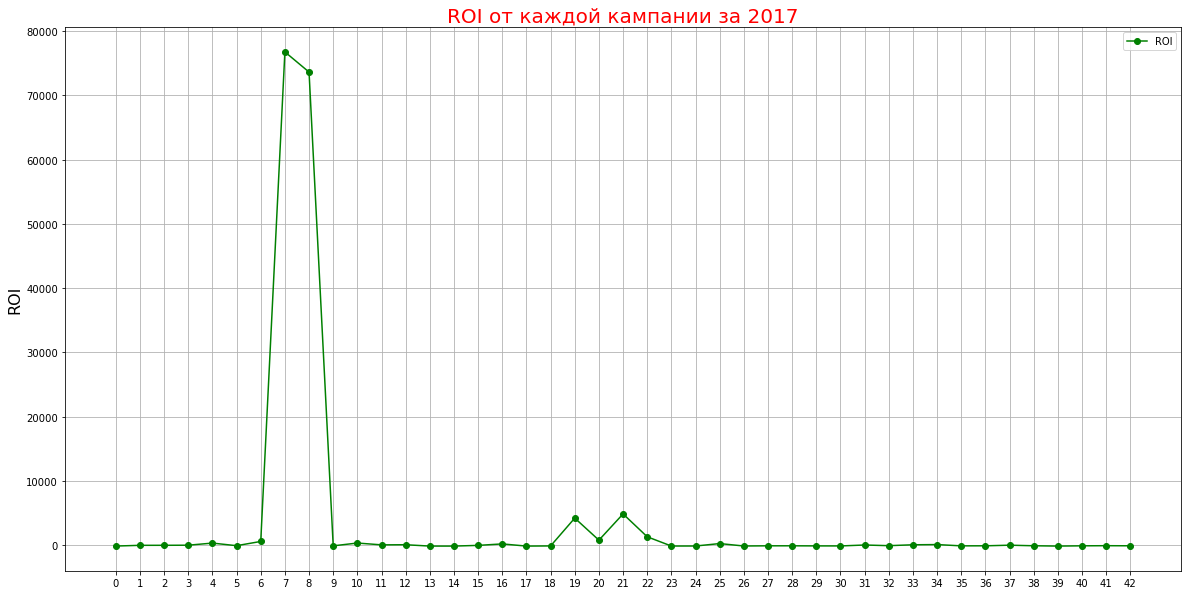

In [38]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2017].shape[0]),data[data['Год']==2017]['ROI'].values,label='ROI',color='green',marker='o')
plt.grid()
plt.legend()
plt.ylabel('ROI',size=16)
plt.title('ROI от каждой кампании за 2017', size=20,color='red')
plt.xticks(np.arange(0,data[data["Год"]==2017].shape[0],1));

По графику видно, что есть очень успешная кампания в 2017 году под номером 60 в таблице, а именно Campaign_18 по проекту Project.com. Данная кампания имеют хорошую окупаемость в сравнении с другими, учитывая затраты. Однако не стоит говорить, что это успешная кампания, так как по другим ключевым метрикам она проигрывает.

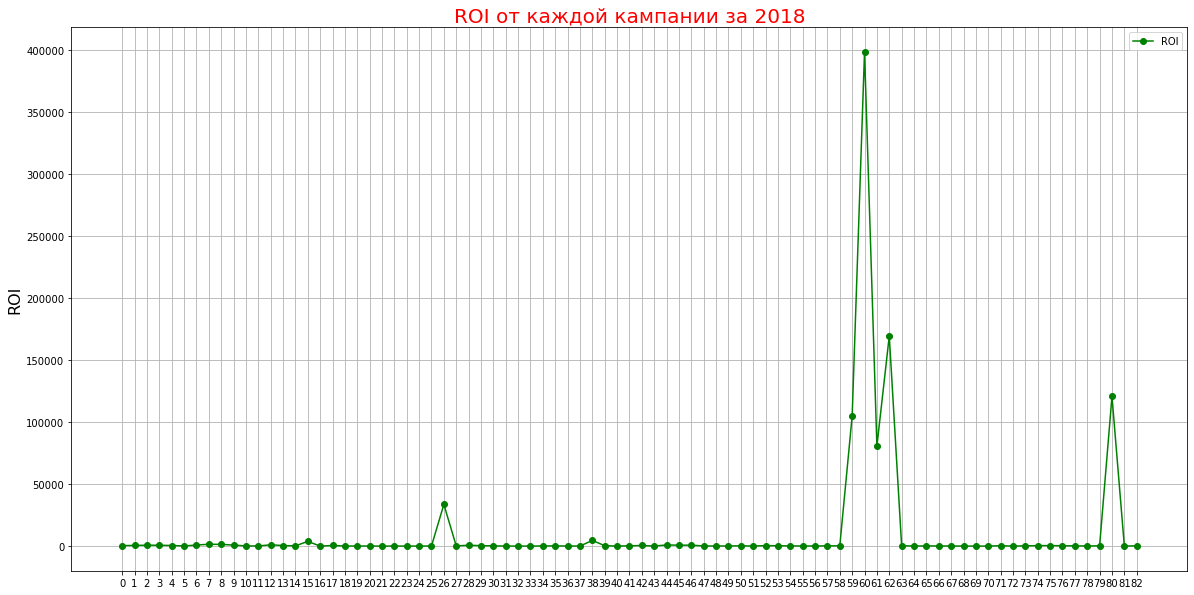

In [44]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2018].shape[0]),data[data['Год']==2018]['ROI'].values,label='ROI',color='green',marker='o')
plt.grid()
plt.legend()
plt.ylabel('ROI',size=16)
plt.title('ROI от каждой кампании за 2018', size=20,color='red')
plt.xticks(np.arange(0,data[data["Год"]==2018].shape[0],1));

По графику видно, что есть очень успешная компания под номером 60 в таблице, опять же Campaign_18. За данным проектом стоит понаблюдать чуть дольше и посмотреть, как он будет себя вести на расстоянии

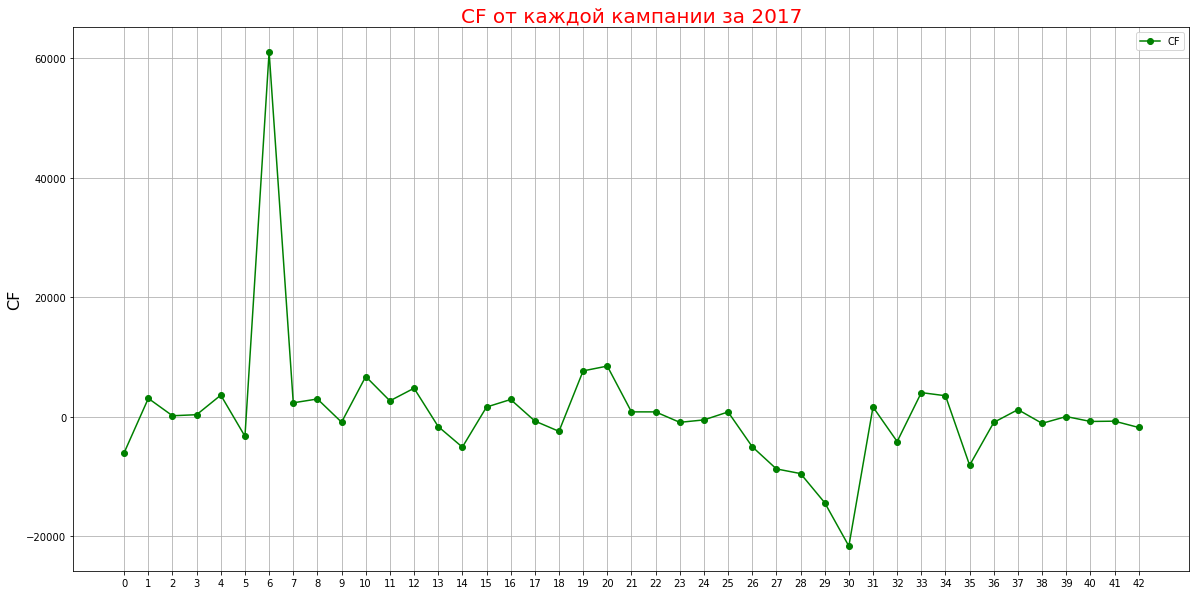

In [27]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2017].shape[0]),data[data['Год']==2017]['CF'].values,label='CF',color='green',marker='o')
plt.grid()
plt.legend()
plt.ylabel('CF',size=16)
plt.title('CF от каждой кампании за 2017', size=20,color='red')
plt.xticks(np.arange(0,data[data["Год"]==2017].shape[0],1));

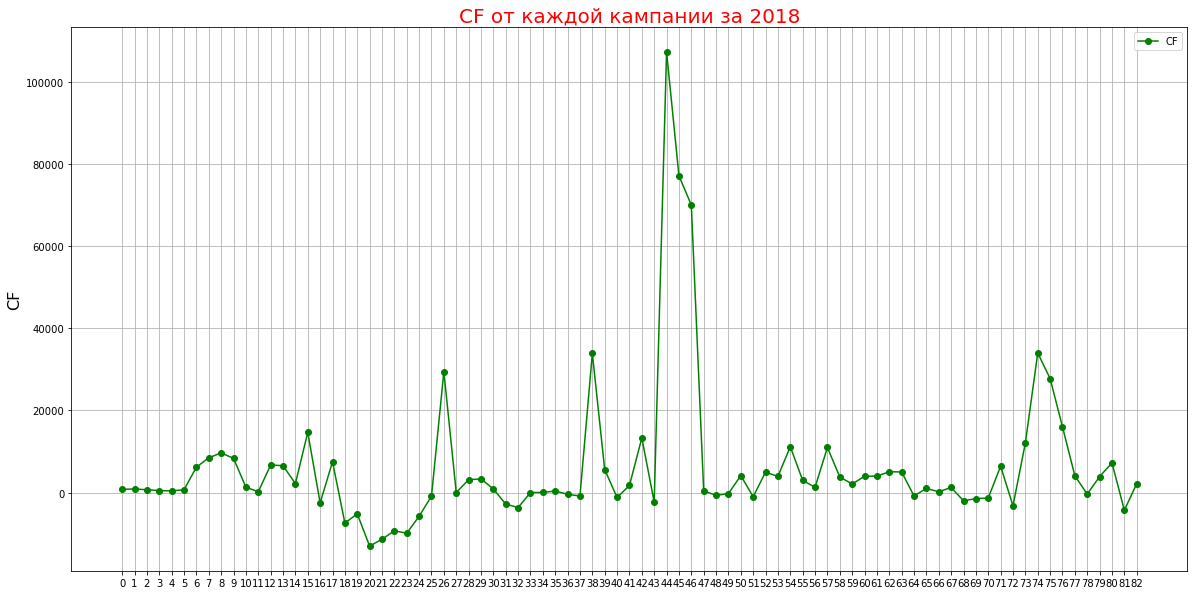

In [50]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(data[data["Год"]==2018].shape[0]),data[data['Год']==2018]['CF'].values,label='CF',color='green',marker='o')
plt.grid()
plt.legend()
plt.ylabel('CF',size=16)
plt.title('CF от каждой кампании за 2018', size=20,color='red')
plt.xticks(np.arange(0,data[data["Год"]==2018].shape[0],1));

К сожалению, по некоторым кампаниям мы видим отрицательный денежный поток как в 2017 году, так и в 2018 году. Отрицательный поток говорит об оттоке денег из бизнеса. Однако в 2018 году мы наблюдаем сокращение доли подобных кампаний, что позитивно влияет на доходность организации в целом.

Вывод: по результатам анализа имеющихся данных и построению графиков различных продуктовых метрик можем заметить, что проекты очень часто имеют низкую окупаемость и приносят мало прибыли. Говоря о доходе, можно заметить, что от проекта к проекту наблюдается большая волатильность дохода, что негативно отражается на реакции компании, ведь она стремится к постоянному и большому доходу от каждой реализации. Мы видим, что лендинги имеют неплохую кликабельность, что означает, что наши затраты на контекстную рекламу, продвижение работают достаточно хорошо в сравнении с рыночными показателями по данной метрике. Средняя кликабельность за 2 года составляет 2,6% от всего потока клиентов на сайте по первому проекту и 4,5% по второму, что является хорошим и конкурентноспособным показателем. По динамике осуществления проектов можно заметить, что 2018 год является болле плодотворным периодом, когда компания более чем в 2 раза наращивает объем проектов.

Вывод: Можем заметить, что project2 является более выгодным проектом для компании, так как по сравнению с аналогом имеет более высокие показатели кликабельности и конверсии, но в то же время меньшие затраты в среднем. Данный канал работает намного эффективнее, а именно на 73% в среднем показывает больше кликов и более чем в 2 раза больше показывает конверсию. Однако сравнивать показатели двух проектов не совсем корректно, так как выборки по ним не равны и стоит провести больше наблюдений, но если тенденция по второму проекту будет сохраняться, то явно второй проект будет более выгодным для компании. Если рассматривать по кампаниям, которые осуществляет организация, то менее выгодными являются Campaign_1  и Campaign_2, так при больших затратах на реализацию, мы получаем очень мало продаж => для нас экономически невыгодно осуществлять данный проект.

Вывод: Также стоит упомянуть, что компания эффективно оптимизирует свою деятельность, так как по наблюдающимся данным видно, что с 2017 года по 2018 год, рассмотренные метрики имеют положительное движение. Кликабельность и конверсию увеличиваются за данный период в среднем, а затраты на привлечение клиентов падают.